# Regression Final Project
## Housing Price Prediction

### Importing Requisite Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
sns.set_style("darkgrid")

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import scipy.stats

# import statsmodels.api as sm

### Reading the Train data

In [3]:
df_data=pd.read_csv("train.csv")

In [4]:
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploratory Data Analysis

In [5]:
df_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#Summary Stats for the data
df_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
## Checking for Object data types
df_data.dtypes[df_data.dtypes==object]

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [8]:
df_data.dtypes[df_data.dtypes==object].shape[0]

43

In [9]:
df_data.dtypes[df_data.dtypes=="int64"]

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [10]:
df_data.dtypes[df_data.dtypes=="float64"]

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

Qualitative confusion <br>
year built<br>
YearRemodAdd<br>
TotRmsAbvGrd<br>
GarageYrBlt<br>
MoSold <br>
YrSold<br>

In [11]:
vars_qual=["MSSubClass", "MSZoning", "Street", "Alley" , "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1","BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"]

In [12]:
len(vars_qual)

46

In [13]:
#Columns with null values greator than zero
pd.DataFrame(df_data.isna().sum()[df_data.isna().sum()>0])

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [14]:
#Count of Columns with "0" values greator than zero
dict_z={}

for i in df_data.columns.values:
    dict_z[i]=df_data[df_data[i]==0].shape[0]

pd.DataFrame.from_dict({x:y for x,y in dict_z.items() if y!=0}, orient="index")

,0
MasVnrArea,861
BsmtFinSF1,467
BsmtFinSF2,1293
BsmtUnfSF,118
TotalBsmtSF,37
2ndFlrSF,829
LowQualFinSF,1434
BsmtFullBath,856
BsmtHalfBath,1378
FullBath,9


__Graphing Data__

In [15]:
# Dropping "Id" column from the data
df_data.drop("Id", inplace=True, axis=1)

In [16]:
## Creating a dataframe for quantitative variables
df_data_quant=df_data.loc[:,~df_data.columns.isin(vars_qual)]

In [17]:
df_data_quant.corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


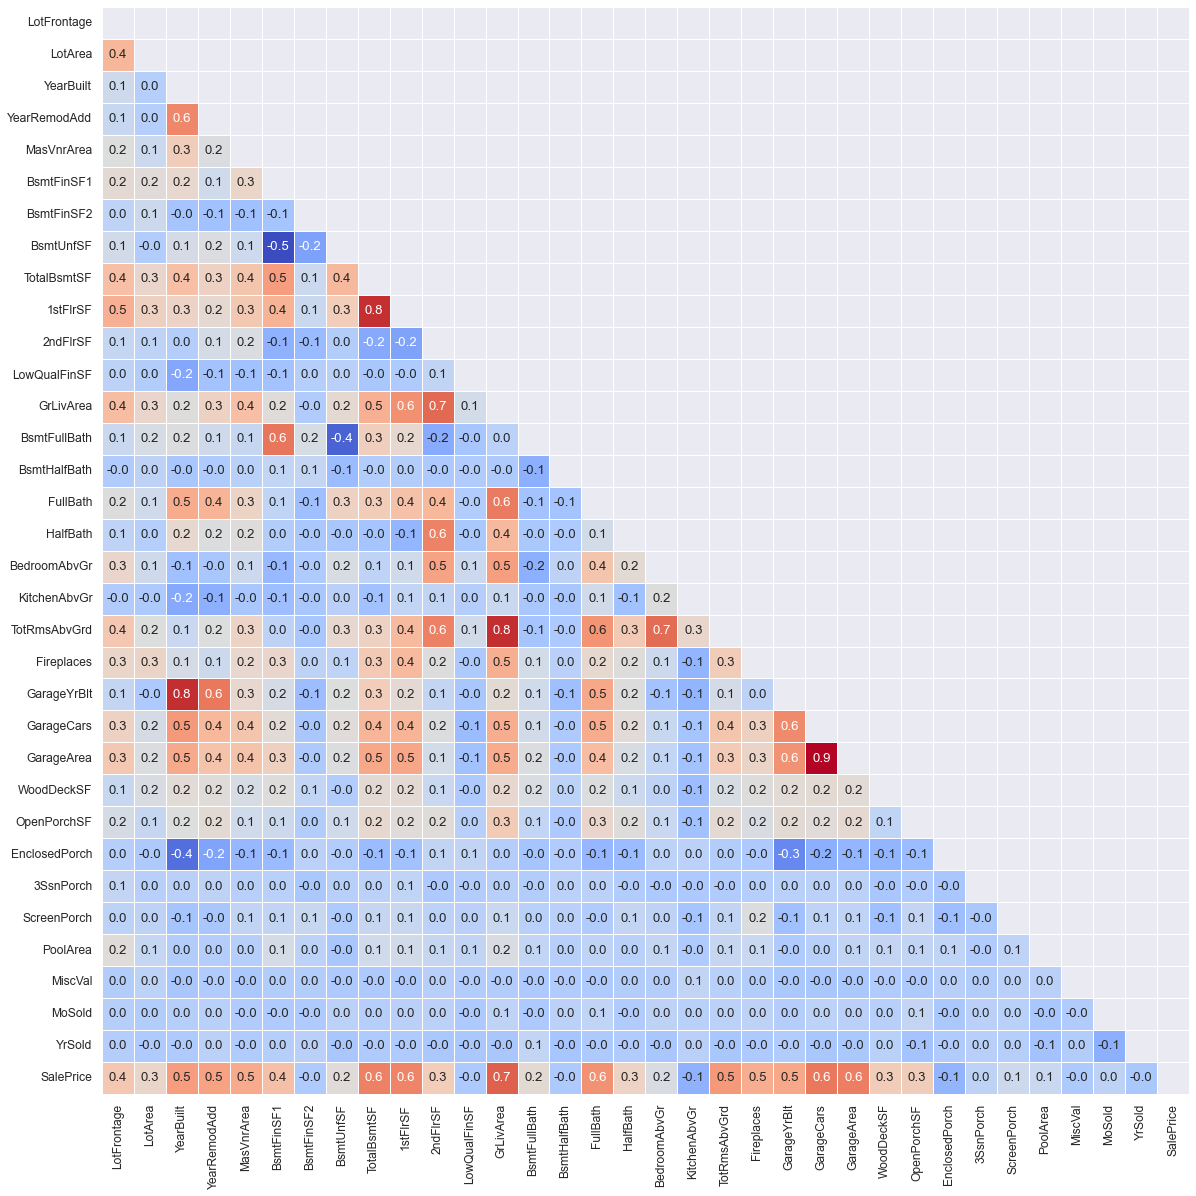

In [18]:
sns.set(font_scale=1.1)
correlation_train = df_data_quant.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

In [19]:
df_data_quant

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,366,0,112,0,0,0,0,4,2010,142125


__Scaling the data__

In [174]:
Y=df_data_quant.iloc[:,-1]

In [175]:
X=df_data_quant.iloc[:,:-1]
cols_x=X.columns.values

In [176]:
X.isna().sum()

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [177]:
X=X.fillna(0)

In [178]:
scaler=StandardScaler()

X=scaler.fit_transform(X)

X=pd.DataFrame(data=X, columns=cols_x)

_Lasso CV_

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [26]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [27]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [28]:
search.fit(X,Y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ........model__alpha=0.1;, score=-1022964838.435 total time=   0.0s
[CV 2/5] END ........model__alpha=0.1;, score=-1433593955.783 total time=   0.0s
[CV 3/5] END ........model__alpha=0.1;, score=-1434486288.373 total time=   0.0s
[CV 4/5] END ........model__alpha=0.1;, score=-1070292373.422 total time=   0.0s
[CV 5/5] END ........model__alpha=0.1;, score=-3003391711.330 total time=   0.0s
[CV 1/5] END ........model__alpha=0.2;, score=-1022954898.006 total time=   0.0s
[CV 2/5] END ........model__alpha=0.2;, score=-1433589488.538 total time=   0.0s
[CV 3/5] END ........model__alpha=0.2;, score=-1434492094.919 total time=   0.0s
[CV 4/5] END ........model__alpha=0.2;, score=-1070288111.204 total time=   0.0s
[CV 5/5] END ........model__alpha=0.2;, score=-3003383562.018 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-1022944958.863 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2372813226.41626, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2376571443.761963, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2380296804.0913086, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordina

[CV 5/5] END model__alpha=0.30000000000000004;, score=-3003375633.584 total time=   0.0s
[CV 1/5] END ........model__alpha=0.4;, score=-1022935021.004 total time=   0.0s
[CV 2/5] END ........model__alpha=0.4;, score=-1433580496.541 total time=   0.0s
[CV 3/5] END ........model__alpha=0.4;, score=-1434503784.052 total time=   0.0s
[CV 4/5] END ........model__alpha=0.4;, score=-1070279656.436 total time=   0.0s
[CV 5/5] END ........model__alpha=0.4;, score=-3003367151.815 total time=   0.0s
[CV 1/5] END ........model__alpha=0.5;, score=-1022925084.432 total time=   0.0s
[CV 2/5] END ........model__alpha=0.5;, score=-1433576002.307 total time=   0.0s
[CV 3/5] END ........model__alpha=0.5;, score=-1434509616.075 total time=   0.0s
[CV 4/5] END ........model__alpha=0.5;, score=-1070275406.070 total time=   0.0s
[CV 5/5] END ........model__alpha=0.5;, score=-3003359501.736 total time=   0.0s
[CV 1/5] END ........model__alpha=0.6;, score=-1022915149.144 total time=   0.0s
[CV 2/5] END .......

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2387648953.7993164, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2391275743.119385, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2394869675.3603516, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 1/5] END model__alpha=0.7000000000000001;, score=-1022905215.142 total time=   0.0s
[CV 2/5] END model__alpha=0.7000000000000001;, score=-1433567097.360 total time=   0.0s
[CV 3/5] END model__alpha=0.7000000000000001;, score=-1434521212.451 total time=   0.0s
[CV 4/5] END model__alpha=0.7000000000000001;, score=-1070266988.534 total time=   0.0s
[CV 5/5] END model__alpha=0.7000000000000001;, score=-3003342808.655 total time=   0.0s
[CV 1/5] END ........model__alpha=0.8;, score=-1022895282.426 total time=   0.0s
[CV 2/5] END ........model__alpha=0.8;, score=-1433562700.564 total time=   0.0s
[CV 3/5] END ........model__alpha=0.8;, score=-1434527106.196 total time=   0.0s
[CV 4/5] END ........model__alpha=0.8;, score=-1070262633.761 total time=   0.0s
[CV 5/5] END ........model__alpha=0.8;, score=-3003335162.181 total time=   0.0s
[CV 1/5] END ........model__alpha=0.9;, score=-1022885350.995 total time=   0.0s
[CV 2/5] END ........model__alpha=0.9;, score=-1433558105.083 total time= 

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2401958968.484619, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2405454329.6135254, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2408916833.5231934, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 3/5] END ........model__alpha=1.0;, score=-1434538782.418 total time=   0.0s
[CV 4/5] END ........model__alpha=1.0;, score=-1070254127.566 total time=   0.0s
[CV 5/5] END ........model__alpha=1.0;, score=-3003318864.255 total time=   0.0s
[CV 1/5] END ........model__alpha=1.1;, score=-1022865491.989 total time=   0.0s
[CV 2/5] END ........model__alpha=1.1;, score=-1433549164.344 total time=   0.0s
[CV 3/5] END ........model__alpha=1.1;, score=-1434544522.248 total time=   0.0s
[CV 4/5] END ........model__alpha=1.1;, score=-1070250025.118 total time=   0.0s
[CV 5/5] END ........model__alpha=1.1;, score=-3003311221.362 total time=   0.0s
[CV 1/5] END model__alpha=1.2000000000000002;, score=-1022855564.414 total time=   0.0s
[CV 2/5] END model__alpha=1.2000000000000002;, score=-1433544571.382 total time=   0.0s
[CV 3/5] END model__alpha=1.2000000000000002;, score=-1434550514.778 total time=   0.0s
[CV 4/5] END model__alpha=1.2000000000000002;, score=-1070245672.399 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2415743270.1655273, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419107202.913574, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2422438278.5632324, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 1/5] END model__alpha=1.4000000000000001;, score=-1022835713.120 total time=   0.0s
[CV 2/5] END model__alpha=1.4000000000000001;, score=-1433535695.406 total time=   0.0s
[CV 3/5] END model__alpha=1.4000000000000001;, score=-1434561997.404 total time=   0.0s
[CV 4/5] END model__alpha=1.4000000000000001;, score=-1070237280.007 total time=   0.0s
[CV 5/5] END model__alpha=1.4000000000000001;, score=-3003287016.970 total time=   0.0s
[CV 1/5] END model__alpha=1.5000000000000002;, score=-1022825789.401 total time=   0.0s
[CV 2/5] END model__alpha=1.5000000000000002;, score=-1433531104.888 total time=   0.0s
[CV 3/5] END model__alpha=1.5000000000000002;, score=-1434568058.701 total time=   0.0s
[CV 4/5] END model__alpha=1.5000000000000002;, score=-1070232928.847 total time=   0.0s
[CV 5/5] END model__alpha=1.5000000000000002;, score=-3003277761.155 total time=   0.0s
[CV 1/5] END ........model__alpha=1.6;, score=-1022815866.968 total time=   0.0s
[CV 2/5] END ........model__alpha=1.6;,

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2429001858.6865234, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2432234363.0910645, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2435434010.429199, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 5/5] END model__alpha=1.7000000000000002;, score=-3003262488.468 total time=   0.0s
[CV 1/5] END model__alpha=1.8000000000000003;, score=-1022796025.957 total time=   0.0s
[CV 2/5] END model__alpha=1.8000000000000003;, score=-1433517719.718 total time=   0.0s
[CV 3/5] END model__alpha=1.8000000000000003;, score=-1434585288.989 total time=   0.0s
[CV 4/5] END model__alpha=1.8000000000000003;, score=-1070220264.607 total time=   0.0s
[CV 5/5] END model__alpha=1.8000000000000003;, score=-3003254853.905 total time=   0.0s
[CV 1/5] END model__alpha=1.9000000000000001;, score=-1022786107.380 total time=   0.0s
[CV 2/5] END model__alpha=1.9000000000000001;, score=-1433513132.503 total time=   0.0s
[CV 3/5] END model__alpha=1.9000000000000001;, score=-1434591435.120 total time=   0.0s
[CV 4/5] END model__alpha=1.9000000000000001;, score=-1070215915.541 total time=   0.0s
[CV 5/5] END model__alpha=1.9000000000000001;, score=-3003245200.077 total time=   0.0s
[CV 1/5] END ........model__alph

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2441734733.9887695, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2444835810.135254, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2447904029.164795, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 1/5] END ........model__alpha=2.1;, score=-1022766274.082 total time=   0.0s
[CV 2/5] END ........model__alpha=2.1;, score=-1433504432.980 total time=   0.0s
[CV 3/5] END ........model__alpha=2.1;, score=-1434602926.057 total time=   0.0s
[CV 4/5] END ........model__alpha=2.1;, score=-1070207696.067 total time=   0.0s
[CV 5/5] END ........model__alpha=2.1;, score=-3003229936.875 total time=   0.0s
[CV 1/5] END ........model__alpha=2.2;, score=-1022756359.361 total time=   0.0s
[CV 2/5] END ........model__alpha=2.2;, score=-1433499848.010 total time=   0.0s
[CV 3/5] END ........model__alpha=2.2;, score=-1434608672.571 total time=   0.0s
[CV 4/5] END ........model__alpha=2.2;, score=-1070203348.485 total time=   0.0s
[CV 5/5] END ........model__alpha=2.2;, score=-3003222307.055 total time=   0.0s
[CV 1/5] END model__alpha=2.3000000000000003;, score=-1022746445.925 total time=   0.0s
[CV 2/5] END model__alpha=2.3000000000000003;, score=-1433495263.991 total time=   0.0s
[CV 3/5] END m

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2453941896.1367188, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2456911543.944824, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2459848334.7575684, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END ........model__alpha=2.7;, score=-1022706805.037 total time=   0.0s
[CV 2/5] END ........model__alpha=2.7;, score=-1433461685.795 total time=   0.0s
[CV 3/5] END ........model__alpha=2.7;, score=-1434635536.015 total time=   0.0s
[CV 4/5] END ........model__alpha=2.7;, score=-1070179137.614 total time=   0.0s
[CV 5/5] END ........model__alpha=2.7;, score=-3003193548.630 total time=   0.0s
[CV 1/5] END model__alpha=2.8000000000000003;, score=-1022696898.028 total time=   0.0s
[CV 2/5] END model__alpha=2.8000000000000003;, score=-1433453098.264 total time=   0.0s
[CV 3/5] END model__alpha=2.8000000000000003;, score=-1434641288.714 total time=   0.0s
[CV 4/5] END model__alpha=2.8000000000000003;, score=-1070174794.693 total time=   0.0s
[CV 5/5] END model__alpha=2.8000000000000003;, score=-3003185925.742 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2462752268.4553223, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2465623345.0915527, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2468461564.6745605, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(


[CV 1/5] END model__alpha=2.9000000000000004;, score=-1022686992.305 total time=   0.0s
[CV 2/5] END model__alpha=2.9000000000000004;, score=-1433445893.842 total time=   0.0s
[CV 3/5] END model__alpha=2.9000000000000004;, score=-1434647042.110 total time=   0.0s
[CV 4/5] END model__alpha=2.9000000000000004;, score=-1070170452.341 total time=   0.0s
[CV 5/5] END model__alpha=2.9000000000000004;, score=-3003178304.043 total time=   0.0s
[CV 1/5] END model__alpha=3.0000000000000004;, score=-1022677087.867 total time=   0.0s
[CV 2/5] END model__alpha=3.0000000000000004;, score=-1433439597.304 total time=   0.0s
[CV 3/5] END model__alpha=3.0000000000000004;, score=-1434652796.203 total time=   0.0s
[CV 4/5] END model__alpha=3.0000000000000004;, score=-1070166110.560 total time=   0.0s
[CV 5/5] END model__alpha=3.0000000000000004;, score=-3003170683.530 total time=   0.0s
[CV 1/5] END ........model__alpha=3.1;, score=-1022667184.715 total time=   0.0s
[CV 2/5] END ........model__alpha=3.1;,

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2471266927.147705, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2474039432.550049, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(


[CV 3/5] END ........model__alpha=3.1;, score=-1434658550.991 total time=   0.0s
[CV 4/5] END ........model__alpha=3.1;, score=-1070161769.348 total time=   0.0s
[CV 5/5] END ........model__alpha=3.1;, score=-3003163064.206 total time=   0.0s
[CV 1/5] END ........model__alpha=3.2;, score=-1022657282.848 total time=   0.0s
[CV 2/5] END ........model__alpha=3.2;, score=-1433427793.738 total time=   0.0s
[CV 3/5] END ........model__alpha=3.2;, score=-1434664306.477 total time=   0.0s
[CV 4/5] END ........model__alpha=3.2;, score=-1070157428.707 total time=   0.0s
[CV 5/5] END ........model__alpha=3.2;, score=-3003155446.069 total time=   0.0s
[CV 1/5] END model__alpha=3.3000000000000003;, score=-1022647382.266 total time=   0.0s
[CV 2/5] END model__alpha=3.3000000000000003;, score=-1433421500.180 total time=   0.0s
[CV 3/5] END model__alpha=3.3000000000000003;, score=-1434670062.658 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2476779080.890625, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2479485872.1538086, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2482159806.397217, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(


[CV 4/5] END model__alpha=3.3000000000000003;, score=-1070153088.635 total time=   0.0s
[CV 5/5] END model__alpha=3.3000000000000003;, score=-3003147829.119 total time=   0.0s
[CV 1/5] END model__alpha=3.4000000000000004;, score=-1022637482.970 total time=   0.0s
[CV 2/5] END model__alpha=3.4000000000000004;, score=-1433414504.280 total time=   0.0s
[CV 3/5] END model__alpha=3.4000000000000004;, score=-1434675819.537 total time=   0.0s
[CV 4/5] END model__alpha=3.4000000000000004;, score=-1070148749.133 total time=   0.0s
[CV 5/5] END model__alpha=3.4000000000000004;, score=-3003140213.357 total time=   0.0s
[CV 1/5] END model__alpha=3.5000000000000004;, score=-1022627584.959 total time=   0.0s
[CV 2/5] END model__alpha=3.5000000000000004;, score=-1433406458.522 total time=   0.0s
[CV 3/5] END model__alpha=3.5000000000000004;, score=-1434681577.111 total time=   0.0s
[CV 4/5] END model__alpha=3.5000000000000004;, score=-1070144410.201 total time=   0.0s
[CV 5/5] END model__alpha=3.5000

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2484800883.5302734, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2487409103.5700684, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2489984466.5178223, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coord

[CV 2/5] END model__alpha=3.8000000000000003;, score=-1433378100.670 total time=   0.0s
[CV 3/5] END model__alpha=3.8000000000000003;, score=-1434698854.014 total time=   0.0s
[CV 4/5] END model__alpha=3.8000000000000003;, score=-1070131396.825 total time=   0.0s
[CV 5/5] END model__alpha=3.8000000000000003;, score=-3003109762.185 total time=   0.0s
[CV 1/5] END model__alpha=3.9000000000000004;, score=-1022588005.770 total time=   0.0s
[CV 2/5] END model__alpha=3.9000000000000004;, score=-1433372320.431 total time=   0.0s
[CV 3/5] END model__alpha=3.9000000000000004;, score=-1434704614.374 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2492526972.4645996, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11464749715.979004, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11720283127.274658, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 4/5] END model__alpha=3.9000000000000004;, score=-1070162312.520 total time=   0.0s
[CV 5/5] END model__alpha=3.9000000000000004;, score=-3003102152.361 total time=   0.0s
[CV 1/5] END ........model__alpha=4.0;, score=-1022578114.186 total time=   0.0s
[CV 2/5] END ........model__alpha=4.0;, score=-1433366541.150 total time=   0.0s
[CV 3/5] END ........model__alpha=4.0;, score=-1434710375.431 total time=   0.0s
[CV 4/5] END ........model__alpha=4.0;, score=-1070158992.076 total time=   0.0s
[CV 5/5] END ........model__alpha=4.0;, score=-3003094543.725 total time=   0.0s
[CV 1/5] END ........model__alpha=4.1;, score=-1022568223.887 total time=   0.0s
[CV 2/5] END ........model__alpha=4.1;, score=-1433360762.827 total time=   0.0s
[CV 3/5] END ........model__alpha=4.1;, score=-1434716137.184 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2497513413.041504, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11472842961.129395, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11716841780.985596, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 4/5] END ........model__alpha=4.1;, score=-1070155563.152 total time=   0.0s
[CV 5/5] END ........model__alpha=4.1;, score=-3003086936.276 total time=   0.0s
[CV 1/5] END ........model__alpha=4.2;, score=-1022558334.874 total time=   0.0s
[CV 2/5] END ........model__alpha=4.2;, score=-1433354985.462 total time=   0.0s
[CV 3/5] END ........model__alpha=4.2;, score=-1434721899.634 total time=   0.0s
[CV 4/5] END ........model__alpha=4.2;, score=-1070152134.849 total time=   0.0s
[CV 5/5] END ........model__alpha=4.2;, score=-3003079330.014 total time=   0.0s
[CV 1/5] END ........model__alpha=4.3;, score=-1022548447.147 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2502368425.3425293, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11480869975.41455, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11724414128.043213, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 2/5] END ........model__alpha=4.3;, score=-1433349209.055 total time=   0.0s
[CV 3/5] END ........model__alpha=4.3;, score=-1434727662.780 total time=   0.0s
[CV 4/5] END ........model__alpha=4.3;, score=-1070148707.114 total time=   0.0s
[CV 5/5] END ........model__alpha=4.3;, score=-3003071724.941 total time=   0.0s
[CV 1/5] END model__alpha=4.3999999999999995;, score=-1022538560.704 total time=   0.0s
[CV 2/5] END model__alpha=4.3999999999999995;, score=-1433343433.606 total time=   0.0s
[CV 3/5] END model__alpha=4.3999999999999995;, score=-1434733426.623 total time=   0.0s
[CV 4/5] END model__alpha=4.3999999999999995;, score=-1070145279.947 total time=   0.0s
[CV 5/5] END model__alpha=4.3999999999999995;, score=-3003064121.054 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2507092009.388916, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11488830721.255371, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11731925691.205566, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 1/5] END ........model__alpha=4.5;, score=-1022528675.547 total time=   0.0s
[CV 2/5] END ........model__alpha=4.5;, score=-1433337659.116 total time=   0.0s
[CV 3/5] END ........model__alpha=4.5;, score=-1434739191.162 total time=   0.0s
[CV 4/5] END ........model__alpha=4.5;, score=-1070141853.347 total time=   0.0s
[CV 5/5] END ........model__alpha=4.5;, score=-3003056518.356 total time=   0.0s
[CV 1/5] END ........model__alpha=4.6;, score=-1022518791.676 total time=   0.0s
[CV 2/5] END ........model__alpha=4.6;, score=-1433331885.583 total time=   0.0s
[CV 3/5] END ........model__alpha=4.6;, score=-1434744956.397 total time=   0.0s
[CV 4/5] END ........model__alpha=4.6;, score=-1070138427.314 total time=   0.0s
[CV 5/5] END ........model__alpha=4.6;, score=-3003048916.845 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2511684165.0786133, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11496725373.20288, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11739376630.699463, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 1/5] END ........model__alpha=4.7;, score=-1022508909.090 total time=   0.0s
[CV 2/5] END ........model__alpha=4.7;, score=-1433326113.009 total time=   0.0s
[CV 3/5] END ........model__alpha=4.7;, score=-1434750722.329 total time=   0.0s
[CV 4/5] END ........model__alpha=4.7;, score=-1070135001.849 total time=   0.0s
[CV 5/5] END ........model__alpha=4.7;, score=-3003041316.521 total time=   0.0s
[CV 1/5] END ........model__alpha=4.8;, score=-1022499027.789 total time=   0.0s
[CV 2/5] END ........model__alpha=4.8;, score=-1433320341.393 total time=   0.0s
[CV 3/5] END ........model__alpha=4.8;, score=-1434756488.958 total time=   0.0s
[CV 4/5] END ........model__alpha=4.8;, score=-1070131576.951 total time=   0.0s
[CV 5/5] END ........model__alpha=4.8;, score=-3003033717.385 total time=   0.0s
[CV 1/5] END ........model__alpha=4.9;, score=-1022489147.774 total time=   0.0s
[CV 2/5] END ........model__alpha=4.9;, score=-1433314570.734 total time=   0.0s
[CV 3/5] END ........model__

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11504553810.104736, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11746766860.667725, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2518325970.63501, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordina

[CV 1/5] END ........model__alpha=5.1;, score=-1022469391.599 total time=   0.0s
[CV 2/5] END ........model__alpha=5.1;, score=-1433303032.292 total time=   0.0s
[CV 3/5] END ........model__alpha=5.1;, score=-1434826809.061 total time=   0.0s
[CV 4/5] END ........model__alpha=5.1;, score=-1070121305.659 total time=   0.0s
[CV 5/5] END ........model__alpha=5.1;, score=-3003010927.103 total time=   0.0s
[CV 1/5] END ........model__alpha=5.2;, score=-1022457597.876 total time=   0.0s
[CV 2/5] END ........model__alpha=5.2;, score=-1433297264.508 total time=   0.0s
[CV 3/5] END ........model__alpha=5.2;, score=-1434833680.454 total time=   0.0s
[CV 4/5] END ........model__alpha=5.2;, score=-1070117883.030 total time=   0.0s
[CV 5/5] END ........model__alpha=5.2;, score=-3003003332.718 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11512316051.522705, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10623648535.379883, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11754096469.78125, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 1/5] END ........model__alpha=5.3;, score=-1022444476.560 total time=   0.0s
[CV 2/5] END ........model__alpha=5.3;, score=-1433291497.682 total time=   0.0s
[CV 3/5] END ........model__alpha=5.3;, score=-1434840492.603 total time=   0.0s
[CV 4/5] END ........model__alpha=5.3;, score=-1070114460.968 total time=   0.0s
[CV 5/5] END ........model__alpha=5.3;, score=-3002995739.520 total time=   0.0s
[CV 1/5] END ........model__alpha=5.4;, score=-1022434499.401 total time=   0.0s
[CV 2/5] END ........model__alpha=5.4;, score=-1433285731.815 total time=   0.0s
[CV 3/5] END ........model__alpha=5.4;, score=-1434847305.355 total time=   0.0s
[CV 4/5] END ........model__alpha=5.4;, score=-1070111039.473 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11520012120.61621, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10620812254.969482, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11761365359.773438, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 5/5] END ........model__alpha=5.4;, score=-3002988147.509 total time=   0.0s
[CV 1/5] END ........model__alpha=5.5;, score=-1022424528.844 total time=   0.0s
[CV 2/5] END ........model__alpha=5.5;, score=-1433279966.905 total time=   0.0s
[CV 3/5] END ........model__alpha=5.5;, score=-1434854118.843 total time=   0.0s
[CV 4/5] END ........model__alpha=5.5;, score=-1070107618.546 total time=   0.0s
[CV 5/5] END ........model__alpha=5.5;, score=-3002980556.687 total time=   0.0s
[CV 1/5] END ........model__alpha=5.6;, score=-1022414559.765 total time=   0.0s
[CV 2/5] END ........model__alpha=5.6;, score=-1433274202.953 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11677204007.207275, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11527641861.275879, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10627460654.876465, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 3/5] END ........model__alpha=5.6;, score=-1434862680.447 total time=   0.0s
[CV 4/5] END ........model__alpha=5.6;, score=-1070104198.186 total time=   0.0s
[CV 5/5] END ........model__alpha=5.6;, score=-3002972967.051 total time=   0.0s
[CV 1/5] END ........model__alpha=5.7;, score=-1022404591.964 total time=   0.0s
[CV 2/5] END ........model__alpha=5.7;, score=-1433268439.960 total time=   0.0s
[CV 3/5] END ........model__alpha=5.7;, score=-1434869649.598 total time=   0.0s
[CV 4/5] END ........model__alpha=5.7;, score=-1070100778.393 total time=   0.0s
[CV 5/5] END ........model__alpha=5.7;, score=-3002965378.604 total time=   0.0s
[CV 1/5] END ........model__alpha=5.8;, score=-1022394625.431 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11772155030.408691, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11683981778.85498, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11535205611.174316, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 2/5] END ........model__alpha=5.8;, score=-1433262677.924 total time=   0.0s
[CV 3/5] END ........model__alpha=5.8;, score=-1434876539.530 total time=   0.0s
[CV 4/5] END ........model__alpha=5.8;, score=-1070097359.167 total time=   0.0s
[CV 5/5] END ........model__alpha=5.8;, score=-3002957791.344 total time=   0.0s
[CV 1/5] END ........model__alpha=5.9;, score=-1022384660.166 total time=   0.0s
[CV 2/5] END ........model__alpha=5.9;, score=-1433256916.847 total time=   0.0s
[CV 3/5] END ........model__alpha=5.9;, score=-1434881956.107 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11779272236.500244, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11690705284.945312, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11542703062.252441, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 4/5] END ........model__alpha=5.9;, score=-1070093940.508 total time=   0.0s
[CV 5/5] END ........model__alpha=5.9;, score=-3002950205.271 total time=   0.0s
[CV 1/5] END ........model__alpha=6.0;, score=-1022374696.169 total time=   0.0s
[CV 2/5] END ........model__alpha=6.0;, score=-1433251156.728 total time=   0.0s
[CV 3/5] END ........model__alpha=6.0;, score=-1434888845.362 total time=   0.0s
[CV 4/5] END ........model__alpha=6.0;, score=-1070090522.417 total time=   0.0s
[CV 5/5] END ........model__alpha=6.0;, score=-3002942620.386 total time=   0.0s
[CV 1/5] END ........model__alpha=6.1;, score=-1022364733.440 total time=   0.0s
[CV 2/5] END ........model__alpha=6.1;, score=-1433245397.567 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10618819055.96045, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11786328822.483398, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11697382806.719238, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 3/5] END ........model__alpha=6.1;, score=-1434895678.737 total time=   0.0s
[CV 4/5] END ........model__alpha=6.1;, score=-1070087104.893 total time=   0.0s
[CV 5/5] END ........model__alpha=6.1;, score=-3002935036.689 total time=   0.0s
[CV 1/5] END ........model__alpha=6.2;, score=-1022354771.979 total time=   0.0s
[CV 2/5] END ........model__alpha=6.2;, score=-1433239639.363 total time=   0.0s
[CV 3/5] END ........model__alpha=6.2;, score=-1434902511.396 total time=   0.0s
[CV 4/5] END ........model__alpha=6.2;, score=-1070083687.936 total time=   0.0s
[CV 5/5] END ........model__alpha=6.2;, score=-3002927454.179 total time=   0.0s
[CV 1/5] END ........model__alpha=6.3;, score=-1022344811.786 total time=   0.0s
[CV 2/5] END ........model__alpha=6.3;, score=-1433233882.119 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10624723736.184326, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11793324798.70337, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11704014299.177979, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 3/5] END ........model__alpha=6.3;, score=-1434909344.803 total time=   0.0s
[CV 4/5] END ........model__alpha=6.3;, score=-1070080271.547 total time=   0.0s
[CV 5/5] END ........model__alpha=6.3;, score=-3002919872.857 total time=   0.0s
[CV 1/5] END ........model__alpha=6.4;, score=-1022334852.861 total time=   0.0s
[CV 2/5] END ........model__alpha=6.4;, score=-1433228125.832 total time=   0.0s
[CV 3/5] END ........model__alpha=6.4;, score=-1434916179.044 total time=   0.0s
[CV 4/5] END ........model__alpha=6.4;, score=-1070076855.725 total time=   0.0s
[CV 5/5] END ........model__alpha=6.4;, score=-3002912292.722 total time=   0.0s
[CV 1/5] END ........model__alpha=6.5;, score=-1022324895.203 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11561157105.532959, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10630561100.30542, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11800259975.249268, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 2/5] END ........model__alpha=6.5;, score=-1433222370.503 total time=   0.0s
[CV 3/5] END ........model__alpha=6.5;, score=-1434923014.122 total time=   0.0s
[CV 4/5] END ........model__alpha=6.5;, score=-1070073440.470 total time=   0.0s
[CV 5/5] END ........model__alpha=6.5;, score=-3002904713.775 total time=   0.0s
[CV 1/5] END ........model__alpha=6.6;, score=-1022314938.814 total time=   0.0s
[CV 2/5] END ........model__alpha=6.6;, score=-1433216616.132 total time=   0.0s
[CV 3/5] END ........model__alpha=6.6;, score=-1434929850.038 total time=   0.0s
[CV 4/5] END ........model__alpha=6.6;, score=-1070070025.782 total time=   0.0s
[CV 5/5] END ........model__alpha=6.6;, score=-3002897136.015 total time=   0.0s
[CV 1/5] END ........model__alpha=6.7;, score=-1022304983.692 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11568422933.777588, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10636355178.81665, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11807134577.851318, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 2/5] END ........model__alpha=6.7;, score=-1433200996.478 total time=   0.0s
[CV 3/5] END ........model__alpha=6.7;, score=-1434936686.792 total time=   0.0s
[CV 4/5] END ........model__alpha=6.7;, score=-1070066611.661 total time=   0.0s
[CV 5/5] END ........model__alpha=6.7;, score=-3002889559.444 total time=   0.0s
[CV 1/5] END ........model__alpha=6.8;, score=-1022295029.838 total time=   0.0s
[CV 2/5] END ........model__alpha=6.8;, score=-1433182761.626 total time=   0.0s
[CV 3/5] END ........model__alpha=6.8;, score=-1434943524.383 total time=   0.0s
[CV 4/5] END ........model__alpha=6.8;, score=-1070063198.108 total time=   0.0s
[CV 5/5] END ........model__alpha=6.8;, score=-3002881984.059 total time=   0.0s
[CV 1/5] END ........model__alpha=6.9;, score=-1022285077.252 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11606357801.04956, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10642105160.846924, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11813948505.020752, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 2/5] END ........model__alpha=6.9;, score=-1433165831.120 total time=   0.0s
[CV 3/5] END ........model__alpha=6.9;, score=-1434950362.813 total time=   0.0s
[CV 4/5] END ........model__alpha=6.9;, score=-1070059785.122 total time=   0.0s
[CV 5/5] END ........model__alpha=6.9;, score=-3002874409.862 total time=   0.0s
[CV 1/5] END ........model__alpha=7.0;, score=-1022275125.934 total time=   0.0s
[CV 2/5] END ........model__alpha=7.0;, score=-1433156129.750 total time=   0.0s
[CV 3/5] END ........model__alpha=7.0;, score=-1434957202.079 total time=   0.0s
[CV 4/5] END ........model__alpha=7.0;, score=-1070056372.703 total time=   0.0s
[CV 5/5] END ........model__alpha=7.0;, score=-3002866836.853 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11518099759.912354, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10647811149.157959, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11820701770.521973, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 1/5] END ........model__alpha=7.1;, score=-1022265175.884 total time=   0.0s
[CV 2/5] END ........model__alpha=7.1;, score=-1433149767.501 total time=   0.0s
[CV 3/5] END ........model__alpha=7.1;, score=-1434964042.184 total time=   0.0s
[CV 4/5] END ........model__alpha=7.1;, score=-1070052960.852 total time=   0.0s
[CV 5/5] END ........model__alpha=7.1;, score=-3002859265.032 total time=   0.0s
[CV 1/5] END ........model__alpha=7.2;, score=-1022255227.102 total time=   0.0s
[CV 2/5] END ........model__alpha=7.2;, score=-1433143481.978 total time=   0.0s
[CV 3/5] END ........model__alpha=7.2;, score=-1434988650.808 total time=   0.0s
[CV 4/5] END ........model__alpha=7.2;, score=-1070049549.568 total time=   0.0s
[CV 5/5] END ........model__alpha=7.2;, score=-3002851694.398 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11555545147.948486, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2358029685.8310547, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11827394389.895752, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 1/5] END ........model__alpha=7.3;, score=-1022245279.588 total time=   0.0s
[CV 2/5] END ........model__alpha=7.3;, score=-1433137199.899 total time=   0.0s
[CV 3/5] END ........model__alpha=7.3;, score=-1434999392.555 total time=   0.0s
[CV 4/5] END ........model__alpha=7.3;, score=-1070046138.851 total time=   0.0s
[CV 5/5] END ........model__alpha=7.3;, score=-3002844124.951 total time=   0.0s
[CV 1/5] END ........model__alpha=7.4;, score=-1022235333.341 total time=   0.0s
[CV 2/5] END ........model__alpha=7.4;, score=-1433130918.837 total time=   0.0s
[CV 3/5] END ........model__alpha=7.4;, score=-1435006392.771 total time=   0.0s
[CV 4/5] END ........model__alpha=7.4;, score=-1070042728.701 total time=   0.0s
[CV 5/5] END ........model__alpha=7.4;, score=-3002836556.692 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2711289807.477539, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11834026189.038574, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11742836527.945312, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 1/5] END ........model__alpha=7.5;, score=-1022225388.363 total time=   0.0s
[CV 2/5] END ........model__alpha=7.5;, score=-1433124638.786 total time=   0.0s
[CV 3/5] END ........model__alpha=7.5;, score=-1435013519.401 total time=   0.0s
[CV 4/5] END ........model__alpha=7.5;, score=-1070039319.118 total time=   0.0s
[CV 5/5] END ........model__alpha=7.5;, score=-3002828989.621 total time=   0.0s
[CV 1/5] END ........model__alpha=7.6;, score=-1022215444.652 total time=   0.0s
[CV 2/5] END ........model__alpha=7.6;, score=-1433118359.749 total time=   0.0s
[CV 3/5] END ........model__alpha=7.6;, score=-1435020656.498 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11568328321.05542, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2714700430.241455, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11840597558.936768, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordina

[CV 4/5] END ........model__alpha=7.6;, score=-1070035910.103 total time=   0.0s
[CV 5/5] END ........model__alpha=7.6;, score=-3002821423.737 total time=   0.0s
[CV 1/5] END ........model__alpha=7.7;, score=-1022205502.210 total time=   0.0s
[CV 2/5] END ........model__alpha=7.7;, score=-1433112081.727 total time=   0.0s
[CV 3/5] END ........model__alpha=7.7;, score=-1435027795.032 total time=   0.0s
[CV 4/5] END ........model__alpha=7.7;, score=-1070032501.655 total time=   0.0s
[CV 5/5] END ........model__alpha=7.7;, score=-3002813859.041 total time=   0.0s
[CV 1/5] END ........model__alpha=7.8;, score=-1022195561.035 total time=   0.0s
[CV 2/5] END ........model__alpha=7.8;, score=-1433105804.720 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11574631091.584473, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2718539088.974121, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11847108126.481934, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 3/5] END ........model__alpha=7.8;, score=-1435034934.410 total time=   0.0s
[CV 4/5] END ........model__alpha=7.8;, score=-1070029093.774 total time=   0.0s
[CV 5/5] END ........model__alpha=7.8;, score=-3002806295.533 total time=   0.0s
[CV 1/5] END ........model__alpha=7.9;, score=-1022185621.128 total time=   0.0s
[CV 2/5] END ........model__alpha=7.9;, score=-1433099528.729 total time=   0.0s
[CV 3/5] END ........model__alpha=7.9;, score=-1435042074.594 total time=   0.0s
[CV 4/5] END ........model__alpha=7.9;, score=-1070025686.461 total time=   0.0s
[CV 5/5] END ........model__alpha=7.9;, score=-3002798733.212 total time=   0.0s
[CV 1/5] END ........model__alpha=8.0;, score=-1022175682.489 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11580886309.469238, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2722359862.411621, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11853558002.730225, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 2/5] END ........model__alpha=8.0;, score=-1433093253.753 total time=   0.0s
[CV 3/5] END ........model__alpha=8.0;, score=-1435049215.582 total time=   0.0s
[CV 4/5] END ........model__alpha=8.0;, score=-1070022279.715 total time=   0.0s
[CV 5/5] END ........model__alpha=8.0;, score=-3002791172.078 total time=   0.0s
[CV 1/5] END ........model__alpha=8.1;, score=-1022165745.117 total time=   0.0s
[CV 2/5] END ........model__alpha=8.1;, score=-1433086979.791 total time=   0.0s
[CV 3/5] END ........model__alpha=8.1;, score=-1435056357.374 total time=   0.0s
[CV 4/5] END ........model__alpha=8.1;, score=-1070018873.536 total time=   0.0s
[CV 5/5] END ........model__alpha=8.1;, score=-3002783612.132 total time=   0.0s
[CV 1/5] END ........model__alpha=8.2;, score=-1022155809.014 total time=   0.0s
[CV 2/5] END ........model__alpha=8.2;, score=-1433080706.845 total time=   0.0s
[CV 3/5] END ........model__alpha=8.2;, score=-1435063499.970 total time=   0.0s
[CV 4/5] END ........model__

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11587094258.969482, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2726161251.2001953, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11859947280.750977, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 1/5] END ........model__alpha=8.4;, score=-1022135940.611 total time=   0.0s
[CV 2/5] END ........model__alpha=8.4;, score=-1433068163.999 total time=   0.0s
[CV 3/5] END ........model__alpha=8.4;, score=-1435077787.572 total time=   0.0s
[CV 4/5] END ........model__alpha=8.4;, score=-1070008658.402 total time=   0.0s
[CV 5/5] END ........model__alpha=8.4;, score=-3002760939.420 total time=   0.0s
[CV 1/5] END ........model__alpha=8.5;, score=-1022126008.312 total time=   0.0s
[CV 2/5] END ........model__alpha=8.5;, score=-1433061894.098 total time=   0.0s
[CV 3/5] END ........model__alpha=8.5;, score=-1435084932.579 total time=   0.0s
[CV 4/5] END ........model__alpha=8.5;, score=-1070005254.492 total time=   0.0s
[CV 5/5] END ........model__alpha=8.5;, score=-3002753384.225 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11593254731.059082, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2729943264.416504, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11866275892.039307, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 1/5] END ........model__alpha=8.6;, score=-1022116077.280 total time=   0.0s
[CV 2/5] END ........model__alpha=8.6;, score=-1433055625.212 total time=   0.0s
[CV 3/5] END ........model__alpha=8.6;, score=-1435092078.390 total time=   0.0s
[CV 4/5] END ........model__alpha=8.6;, score=-1070001851.150 total time=   0.0s
[CV 5/5] END ........model__alpha=8.6;, score=-3002745830.217 total time=   0.0s
[CV 1/5] END ........model__alpha=8.7;, score=-1022106147.516 total time=   0.0s
[CV 2/5] END ........model__alpha=8.7;, score=-1433049357.342 total time=   0.0s
[CV 3/5] END ........model__alpha=8.7;, score=-1435099225.004 total time=   0.0s
[CV 4/5] END ........model__alpha=8.7;, score=-1069998448.374 total time=   0.0s
[CV 5/5] END ........model__alpha=8.7;, score=-3002738277.396 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11599367939.006836, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2733705879.0756836, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11872543705.46875, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 1/5] END ........model__alpha=8.8;, score=-1022096219.020 total time=   0.0s
[CV 2/5] END ........model__alpha=8.8;, score=-1433043090.487 total time=   0.0s
[CV 3/5] END ........model__alpha=8.8;, score=-1435106372.422 total time=   0.0s
[CV 4/5] END ........model__alpha=8.8;, score=-1069995046.166 total time=   0.0s
[CV 5/5] END ........model__alpha=8.8;, score=-3002730725.764 total time=   0.0s
[CV 1/5] END ........model__alpha=8.9;, score=-1022086488.622 total time=   0.0s
[CV 2/5] END ........model__alpha=8.9;, score=-1433036824.647 total time=   0.0s
[CV 3/5] END ........model__alpha=8.9;, score=-1435113520.644 total time=   0.0s
[CV 4/5] END ........model__alpha=8.9;, score=-1070031961.726 total time=   0.0s
[CV 5/5] END ........model__alpha=8.9;, score=-3002723175.318 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11605433638.86499, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2737449114.819092, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11878750982.327148, tolerance: 770619031.1834061
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordina

[CV 1/5] END ........model__alpha=9.0;, score=-1022076841.134 total time=   0.0s
[CV 2/5] END ........model__alpha=9.0;, score=-1433030559.822 total time=   0.0s
[CV 3/5] END ........model__alpha=9.0;, score=-1435120669.670 total time=   0.0s
[CV 4/5] END ........model__alpha=9.0;, score=-1070084093.906 total time=   0.0s
[CV 5/5] END ........model__alpha=9.0;, score=-3002634849.873 total time=   0.0s
[CV 1/5] END ........model__alpha=9.1;, score=-1022067194.911 total time=   0.0s
[CV 2/5] END ........model__alpha=9.1;, score=-1433024296.012 total time=   0.0s
[CV 3/5] END ........model__alpha=9.1;, score=-1435127819.499 total time=   0.0s
[CV 4/5] END ........model__alpha=9.1;, score=-1070081561.265 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11611451847.215576, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2741172947.456299, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11792022073.226562, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 5/5] END ........model__alpha=9.1;, score=-3002604343.575 total time=   0.0s
[CV 1/5] END ........model__alpha=9.2;, score=-1022057549.952 total time=   0.0s
[CV 2/5] END ........model__alpha=9.2;, score=-1433018033.217 total time=   0.0s
[CV 3/5] END ........model__alpha=9.2;, score=-1435134970.132 total time=   0.0s
[CV 4/5] END ........model__alpha=9.2;, score=-1070079225.637 total time=   0.0s
[CV 5/5] END ........model__alpha=9.2;, score=-3002600201.508 total time=   0.0s
[CV 1/5] END ........model__alpha=9.3;, score=-1022047906.257 total time=   0.0s
[CV 2/5] END ........model__alpha=9.3;, score=-1433011771.437 total time=   0.0s
[CV 3/5] END ........model__alpha=9.3;, score=-1435142121.569 total time=   0.0s
[CV 4/5] END ........model__alpha=9.3;, score=-1070076881.757 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11617423026.967773, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2744877420.5112305, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10490340674.128906, tolerance: 724930391.3116124
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 5/5] END ........model__alpha=9.3;, score=-3002591723.464 total time=   0.0s
[CV 1/5] END ........model__alpha=9.4;, score=-1022038263.826 total time=   0.0s
[CV 2/5] END ........model__alpha=9.4;, score=-1433005510.673 total time=   0.0s
[CV 3/5] END ........model__alpha=9.4;, score=-1435149273.810 total time=   0.0s
[CV 4/5] END ........model__alpha=9.4;, score=-1070074542.853 total time=   0.0s
[CV 5/5] END ........model__alpha=9.4;, score=-3002583103.128 total time=   0.0s
[CV 1/5] END ........model__alpha=9.5;, score=-1022028622.660 total time=   0.0s
[CV 2/5] END ........model__alpha=9.5;, score=-1432999250.924 total time=   0.0s
[CV 3/5] END ........model__alpha=9.5;, score=-1435156426.854 total time=   0.0s
[CV 4/5] END ........model__alpha=9.5;, score=-1070072204.692 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2748562486.1240234, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10502516792.902832, tolerance: 724930391.3116124
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11803859111.818604, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coord

[CV 5/5] END ........model__alpha=9.5;, score=-3002574468.945 total time=   0.0s
[CV 1/5] END ........model__alpha=9.6;, score=-1022018982.757 total time=   0.0s
[CV 2/5] END ........model__alpha=9.6;, score=-1432992992.190 total time=   0.0s
[CV 3/5] END ........model__alpha=9.6;, score=-1435163580.702 total time=   0.0s
[CV 4/5] END ........model__alpha=9.6;, score=-1070069867.061 total time=   0.0s
[CV 5/5] END ........model__alpha=9.6;, score=-3002565833.691 total time=   0.0s
[CV 1/5] END model__alpha=9.700000000000001;, score=-1022000635.588 total time=   0.0s
[CV 2/5] END model__alpha=9.700000000000001;, score=-1432986734.471 total time=   0.0s
[CV 3/5] END model__alpha=9.700000000000001;, score=-1435170735.354 total time=   0.0s
[CV 4/5] END model__alpha=9.700000000000001;, score=-1070067529.943 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2752228139.772705, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10508995397.305664, tolerance: 724930391.3116124
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1530877386.7172852, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

[CV 5/5] END model__alpha=9.700000000000001;, score=-3002557199.383 total time=   0.0s
[CV 1/5] END ........model__alpha=9.8;, score=-1021982539.337 total time=   0.0s
[CV 2/5] END ........model__alpha=9.8;, score=-1432980477.767 total time=   0.0s
[CV 3/5] END ........model__alpha=9.8;, score=-1435177890.810 total time=   0.0s
[CV 4/5] END ........model__alpha=9.8;, score=-1070065193.337 total time=   0.0s
[CV 5/5] END ........model__alpha=9.8;, score=-3002409536.888 total time=   0.0s
[CV 1/5] END ........model__alpha=9.9;, score=-1021973001.319 total time=   0.0s
[CV 2/5] END ........model__alpha=9.9;, score=-1432974222.078 total time=   0.0s
[CV 3/5] END ........model__alpha=9.9;, score=-1435185047.069 total time=   0.0s
[CV 4/5] END ........model__alpha=9.9;, score=-1070062857.243 total time=   0.0s


C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2755874430.713379, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 775155041.2802734, tolerance: 724930391.3116124
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2580955185.9956055, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

[CV 5/5] END ........model__alpha=9.9;, score=-3002310741.153 total time=   0.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [29]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [30]:
importance = np.abs(coefficients)

In [31]:
z=np.array(X.columns)[importance > 0]

_Forward Selection_

In [179]:
sfs = SFS(LinearRegression(),
          k_features=20,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [180]:
sfs.fit(X.values, Y.values)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=20, scoring='r2')

In [181]:
X

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.212877,-0.207142,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.645747,-0.091886,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.299451,0.073480,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.068587,-0.096897,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.761179,0.375148,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.126303,-0.260560,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,0.790037,0.266407,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0.241735,-0.147810,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,0.299451,-0.080160,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [182]:
cols_list=[X.columns[x] for x in sfs.k_feature_idx_]


In [183]:
X=X.loc[:,cols_list]
# X=X.loc[:,z]

In [184]:
# q="+".join(z)

In [185]:
q="+".join(X.columns.values)

In [186]:
import statsmodels.api as smp

In [187]:
x = X.values
y = Y.tolist()
 
# adding the constant term
x = smp.add_constant(x)
 
# performing the regression
# and fitting the model
result = smp.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     251.3
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:13:27   Log-Likelihood:                -17447.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1439   BIC:                         3.505e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.809e+05    987.713    183.172      0.0

In [188]:
result.mse_model

357914055237.2584

In [105]:
X.columns.values[8]

'1stFlrSF'

In [142]:
sm.ols(formula= 'SalePrice ~ 1stFlrSF', data=pd.concat([X,Y], axis=1)).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [143]:
sm.ols(formula= 'SalePrice ~ {}'.format(q), data=pd.concat([X,Y], axis=1)).fit()

In [145]:
result.mse_model

357939481457.8757

In [189]:
357914055237.2584

357914055237.2584

In [ ]:
scipy.stats.f.ppf(q=1-.05, dfn=20, dfd=1439)